<a href="https://colab.research.google.com/github/lazy-wolf/TME_6016/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Import necessary libraries
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import CIFAR10
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import copy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [2]:
class Model1(nn.Module):
    def __init__(self, input_size=32*32*3, output_size=10):
        super(Model1, self).__init__()
        # Example architecture
        self.fc1 = nn.Linear(input_size, 512)  # First fully connected layer
        self.fc2 = nn.Linear(512, 256)         # Second fully connected layer
        self.fc3 = nn.Linear(256, 128)         # Third fully connected layer
        self.fc4 = nn.Linear(128, 64)          # Fourth fully connected layer
        self.fc5 = nn.Linear(64, output_size)  # Final layer with output size = number of classes

        # Optional: Dropout layer to reduce overfitting
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        # Flatten the input tensor
        X = X.view(X.size(0), -1)

        # Forward pass through the network
        X = F.relu(self.fc1(X))  # Activation function after first layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc2(X))  # Activation function after second layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc3(X))  # Activation function after third layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc4(X))  # Activation function after fourth layer
        X = self.dropout(X)      # Apply dropout
        X = self.fc5(X)          # Final layer, no activation here

        # Apply log_softmax on the output of the last linear layer
        return F.log_softmax(X, dim=1)

In [3]:
class Model2(nn.Module):
    def __init__(self, input_size=32*32*3, output_size=10):
        super(Model2, self).__init__()
        # Example architecture
        self.fc1 = nn.Linear(input_size, 2048)    # First fully connected layer
        self.fc2 = nn.Linear(2048, 1024)          # Second fully connected layer
        self.fc3 = nn.Linear(1024, 512)           # Third fully connected layer
        self.fc4 = nn.Linear(512, 256)            # Fourth fully connected layer
        self.fc5 = nn.Linear(256, 128)            # Fifth fully connected layer
        self.fc6 = nn.Linear(128, 64)             # Sixth fully connected layer
        self.fc7 = nn.Linear(64, output_size)     # Final layer with output size = number of classes

        # Optional: Dropout layer to reduce overfitting
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        # Flatten the input tensor
        X = X.view(X.size(0), -1)

        # Forward pass through the network
        X = F.relu(self.fc1(X))  # Activation function after first layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc2(X))  # Activation function after second layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc3(X))  # Activation function after third layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc4(X))  # Activation function after fourth layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc5(X))  # Activation function after fifth layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc6(X))  # Activation function after sixth layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc7(X))  # Activation function after seventh layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc8(X))  # Activation function after eigth layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc9(X))  # Activation function after ninth layer
        X = self.dropout(X)      # Apply dropout
        X = self.fc10(X)         # Final layer, no activation here

        # Apply log_softmax on the output of the last linear layer
        return F.log_softmax(X, dim=1)

In [4]:
class Model3(nn.Module):
    def __init__(self, input_size=32*32*3, output_size=10):
        super(Model3, self).__init__()
        # Example architecture
        self.fc1 = nn.Linear(input_size, 2500)  # First fully connected layer
        self.fc2 = nn.Linear(2500, 2048)         # Second fully connected layer
        self.fc3 = nn.Linear(2048, 1024)         # Third fully connected layer
        self.fc4 = nn.Linear(1024, 512)          # Fourth fully connected layer
        self.fc5 = nn.Linear(512, 256)  # Final layer with output size = number of classes
        self.fc6 = nn.Linear(256, 128)  # First fully connected layer
        self.fc7 = nn.Linear(128, 64)         # Second fully connected layer
        self.fc8 = nn.Linear(64, 32)         # Third fully connected layer
        self.fc9 = nn.Linear(32, 16)          # Fourth fully connected layer
        self.fc10 = nn.Linear(16, output_size)  # Final layer with output size = number of classes

        # Optional: Dropout layer to reduce overfitting
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        # Flatten the input tensor
        X = X.view(X.size(0), -1)

        # Forward pass through the network
        X = F.relu(self.fc1(X))  # Activation function after first layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc2(X))  # Activation function after second layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc3(X))  # Activation function after third layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc4(X))  # Activation function after fourth layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc5(X))  # Activation function after fifth layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc6(X))  # Activation function after sixth layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc7(X))  # Activation function after seventh layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc8(X))  # Activation function after eigth layer
        X = self.dropout(X)      # Apply dropout
        X = F.relu(self.fc9(X))  # Activation function after ninth layer
        X = self.dropout(X)      # Apply dropout
        X = self.fc10(X)         # Final layer, no activation here

        # Apply log_softmax on the output of the last linear layer
        return F.log_softmax(X, dim=1)

In [5]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
mean = [0.4914, 0.4822, 0.4465]
std = [0.2470, 0.2435, 0.2616]

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])

In [8]:
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:03<00:00, 48781992.51it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [9]:
print("Training: ", len(trainset)) #Training:  50000
print("Testing: ", len(testset)) #Testing:  10000

Training:  50000
Testing:  10000


In [10]:
image, label = trainset[0]
print(type(image))#<class 'torch.Tensor'>

classes = trainset.classes
print(classes) #['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(label)#6
print(classes[label])#frog

<class 'torch.Tensor'>
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
6
frog


In [11]:
torch.manual_seed(80)
# Creating subsets for 25K training and 5K testing samples randomly
train_subset = Subset(trainset, torch.randperm(len(trainset))[:25000])
test_subset = Subset(testset, torch.randperm(len(testset))[:5000])

In [12]:
model1 = Model1().to(device)
model2 = Model2().to(device)
model3 = Model3().to(device)

In [13]:
print(model1)
print(model2)
print(model3)

Model1(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
Model2(
  (fc1): Linear(in_features=3072, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=64, bias=True)
  (fc7): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
Model3(
  (fc1): Linear(in_features=3072, out_features=2500, bias=True)
  (fc2): Linear(in_features=2500, out_features=2048, bias=True)
  (fc3): Linea

In [14]:
class CustomLoss(nn.Module):
    def __init__(self, model):
        super(CustomLoss, self).__init__()
        self.model = model
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, output, target):
        # Compute the basic CrossEntropyLoss
        loss = self.criterion(output, target)

        # Compute the L2 regularization term
        l2_reg = torch.tensor(0.).to(output.device)  # Ensure the tensor is on the same device as the output
        for param in self.model.parameters():
            l2_reg += torch.sum(torch.square(param))

        # Combine the CrossEntropyLoss and the L2 regularization term
        total_loss = loss + (0.001 * l2_reg)
        return total_loss

In [15]:
criterion = CustomLoss(model1)
optimizer = optim.Adam(model1.parameters(), lr=0.001)

In [16]:
trainloader = DataLoader(train_subset, batch_size=32, shuffle=True)
testloader = DataLoader(test_subset, batch_size=32, shuffle=True)

In [17]:
for images, labels in trainloader:
  break
print(labels) # Labels of each image in a batch
print(images.shape) # torch.Size([100, 3, 32, 32])
print(images.view(-1, 3072).shape)  #torch.Size([100, 3072])

tensor([3, 0, 1, 0, 6, 9, 6, 4, 0, 0, 3, 8, 8, 3, 0, 4, 3, 9, 4, 1, 5, 9, 8, 1,
        5, 9, 7, 4, 6, 5, 8, 3])
torch.Size([32, 3, 32, 32])
torch.Size([32, 3072])


In [19]:
def train_model(model, trainloader, epochs = 5):
  best_loss = float('inf')
  best_model_weights = copy.deepcopy(model1.state_dict())
  for epoch in range(epochs):  # loop over the dataset multiple times
    model1.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
    #save best weights
    epoch_loss = running_loss / len(trainloader)
    if epoch_loss < best_loss:
      # print(best_loss,epoch_loss)
      best_loss = copy.copy(epoch_loss)
      best_model_weights = copy.deepcopy(model1.state_dict())
    print(f'Epoch {epoch+1}, Loss: {epoch_loss}')
  print('Finished Training')
  return best_loss, best_model_weights


In [20]:
best_model1_params = train_model(model=model1, trainloader=trainloader)

Epoch 1, Loss: 2.396306008024289
Epoch 2, Loss: 2.288221457272844
Epoch 3, Loss: 2.263965819650294
Epoch 4, Loss: 2.247602632893321
Epoch 5, Loss: 2.2467929323006164
Finished Training


In [21]:
best_model1_params[0]

2.2467929323006164

In [22]:
best_model2_params = train_model(model=model2, trainloader=trainloader)

Epoch 1, Loss: 2.244720909296704
Epoch 2, Loss: 2.2456855043730775
Epoch 3, Loss: 2.2416505603229298
Epoch 4, Loss: 2.2368893728536716
Epoch 5, Loss: 2.2473868652987665
Finished Training


In [23]:
best_model2_params[0]

2.2368893728536716

In [24]:
best_model3_params = train_model(model=model3, trainloader=trainloader)

Epoch 1, Loss: 2.2363486004912336
Epoch 2, Loss: 2.243446410312067
Epoch 3, Loss: 2.247412549260327
Epoch 4, Loss: 2.2441288810556808
Epoch 5, Loss: 2.2502616569209284
Finished Training


In [25]:
best_model3_params[0]

2.2363486004912336

In [53]:
def eval_model(model,testloader):
  y_true = []
  y_pred = []
  model.eval()
  with torch.no_grad():
      for data in testloader:
          images, labels = data[0].to(device), data[1].to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          y_true.extend(labels.tolist())
          y_pred.extend(predicted.tolist())
  print(f"Accuracy of the {model.__class__.__name__} is : {accuracy_score(y_true, y_pred)}")
  return y_true, y_pred

In [54]:
def conf_matrix_values(y_test,y_pred,class_value):
  TN, FP, FN, TP = 0, 0, 0 , 0
  y_test_class=[1 if i==class_value else 0 for i in y_test]
  y_pred_class=[1 if i==class_value else 0 for i in y_pred]
  for i in range(len(y_test)):
    if y_test_class[i] == 0:
      if y_pred_class[i] == 0:
        TN+=1
      else:
        FP+=1
    if y_test_class[i] == 1:
      if y_pred_class[i] == 1:
        TP+=1
      else:
        FN+=1
  accuracy = (TP+TN)/(TP+FN+FP+TN) if (TP+FN+FP+TN) != 0  else 0
  precision = TP/(TP+FP) if (TP + FP) != 0  else 0
  recall = TP/(TP+FN) if (TP + FN) != 0  else 0
  #TP, FP, TN, FN
  return f"TP : {TP}, FP : {FP}, TN : {TN}, FN : {FN}\nAccuracy : {accuracy}\nPrecision : {precision}\nRecall : {recall}"


In [55]:
y_true, model1_y_pred = eval_model(model=model1,testloader=testloader)

Accuracy of the Model1 is : 0.3184


In [46]:
y_true[:10]

[0, 1, 8, 8, 4, 8, 7, 7, 9, 2]

In [56]:
model1_y_pred[:10]

[8, 1, 6, 6, 8, 6, 6, 1, 1, 1]

In [57]:
for i in range(10):
  print(f"Class {i+1}: Class-{i+1} Label")
  print(conf_matrix_values(y_true,model1_y_pred,i))
  print()

Class 1: Class-1 Label
TP : 140, FP : 140, TN : 4324, FN : 396
Accuracy : 0.8928
Precision : 0.5
Recall : 0.26119402985074625

Class 2: Class-2 Label
TP : 320, FP : 756, TN : 3768, FN : 156
Accuracy : 0.8176
Precision : 0.29739776951672864
Recall : 0.6722689075630253

Class 3: Class-3 Label
TP : 3, FP : 4, TN : 4505, FN : 488
Accuracy : 0.9016
Precision : 0.42857142857142855
Recall : 0.006109979633401222

Class 4: Class-4 Label
TP : 0, FP : 0, TN : 4517, FN : 483
Accuracy : 0.9034
Precision : 0
Recall : 0.0

Class 5: Class-5 Label
TP : 198, FP : 472, TN : 4026, FN : 304
Accuracy : 0.8448
Precision : 0.2955223880597015
Recall : 0.3944223107569721

Class 6: Class-6 Label
TP : 178, FP : 364, TN : 4138, FN : 320
Accuracy : 0.8632
Precision : 0.3284132841328413
Recall : 0.357429718875502

Class 7: Class-7 Label
TP : 243, FP : 696, TN : 3804, FN : 257
Accuracy : 0.8094
Precision : 0.25878594249201275
Recall : 0.486

Class 8: Class-8 Label
TP : 109, FP : 82, TN : 4410, FN : 399
Accuracy : 0.9

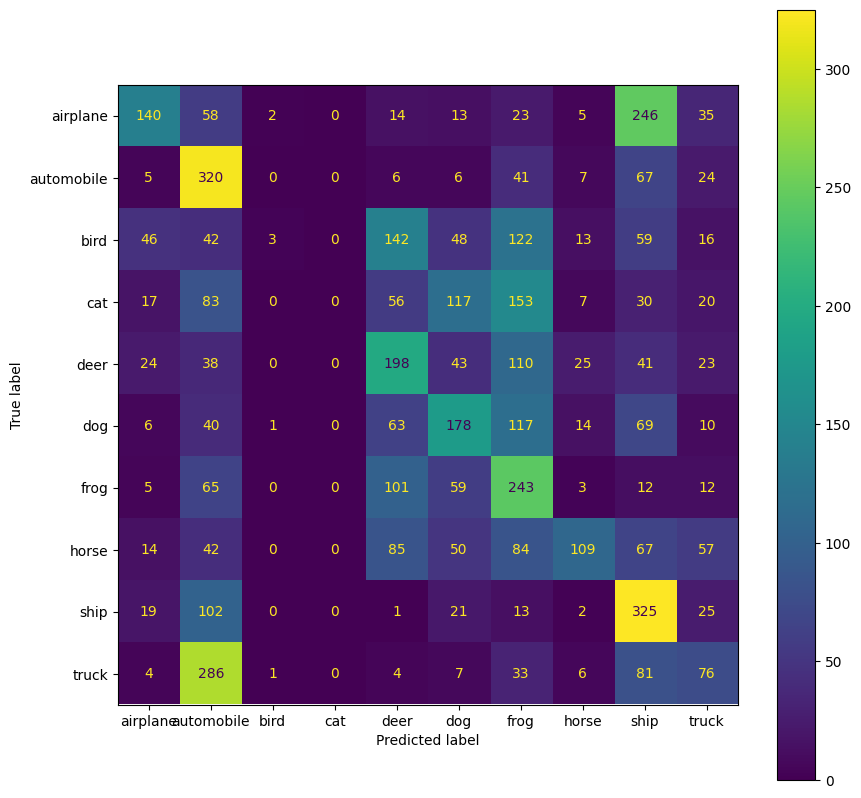

In [58]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true,model1_y_pred), display_labels = trainset.classes)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.show()